In [11]:
from transformers import ViTImageProcessor
from utils import download_imagenet_labels, overlay, overlay2, plot_auc_line
import time
from PIL import Image
from sigrate import SIGRATE

# Parameters

In [12]:
# Image processor for ViT model (only used for resizing image during the plot)
resizer = ViTImageProcessor(do_rescale=False, do_normalize=False)

# URL to download ImageNet labels
imagenet_labels_url = 'https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt'
class_labels = download_imagenet_labels(imagenet_labels_url)
class_labels_lower = [cls.lower() for cls in class_labels]
imagenet_label_dict = {index: label for index, label in enumerate(class_labels)}

In [26]:
token_ratio = 0.50
masks_layers = 4
starting_layer = 0

# ViT

In [27]:
# Initialize MUTEX model for ViT
model_vit = SIGRATE('vit', 'cpu')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


## Single Image Plot

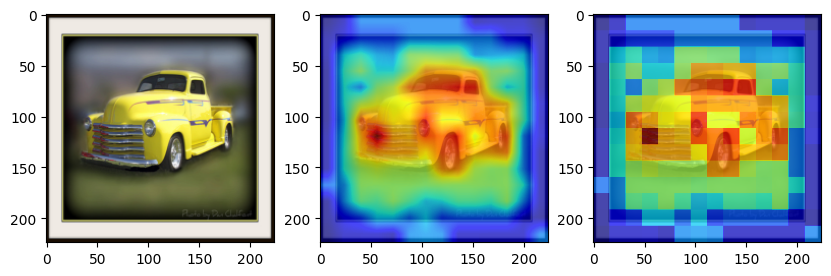

In [28]:
img_path = '../Example_images/pickup.jpg'

# Open the image using PIL
image = Image.open(img_path).convert('RGB')

# Resize and preprocess the image for the model
img = resizer(image, return_tensors="pt")['pixel_values'][0]

saliency, label = model_vit.get_saliency(img_path, token_ratio, masks_layers, starting_layer)

# Display overlay of image and saliency map
overlay(img, saliency)

## Multi image plot with AUC

In [29]:
img_paths = [
            '../Example_images/ski.jpg',
            '../Example_images/spoonbill.jpg',
            '../Example_images/pickup.jpg',
            ]

# Percentage of patches for insertion and deletion metrics
patch_perc = [1, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# Baseline for insertion and deletion calculation
baseline = 'black'

Time taken: 1.9127182960510254


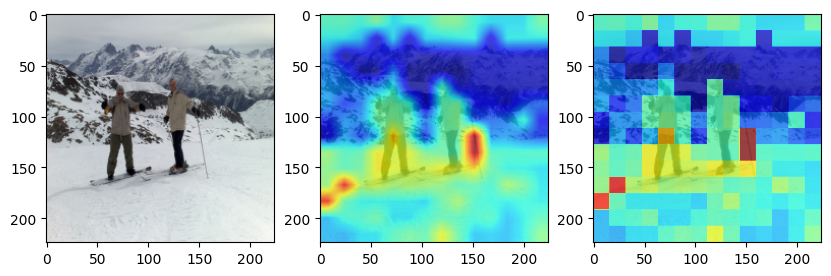

Time taken: 2.0898752212524414


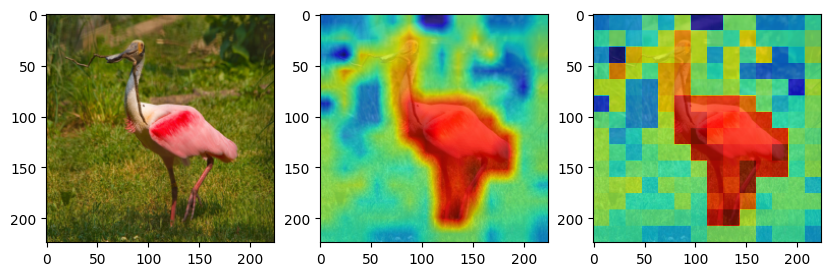

Time taken: 2.198465347290039


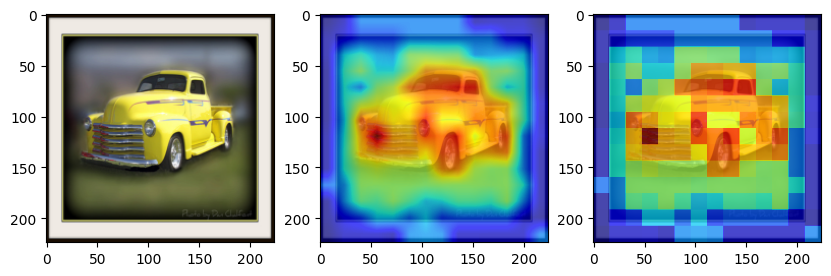

In [30]:
## Lists to store metrics, images, and labels
metrics_list = []
images_list = []
label_list = []
saliency_list = []

# Loop over each image path
for i in range(len(img_paths)):
    img_path = img_paths[i]
    start_time = time.time()

    # Get saliency map and label using MLEx model
    saliency, label = model_vit.get_saliency(img_path, token_ratio, masks_layers, starting_layer)
    print(f'Time taken: {time.time() - start_time}')

    # Open the image using PIL
    image = Image.open(img_path).convert('RGB')

    # Resize and preprocess the image for the model
    img = resizer(image, return_tensors="pt")['pixel_values'][0]

    # Display overlay of image and saliency map
    overlay(img, saliency)

    # Get insertion and deletion metrics
    metrics = model_vit.get_insertion_deletion(patch_perc, saliency, image, baseline, label)

    # Append metrics, image, and label to respective lists
    metrics_list.append(metrics)
    images_list.append(img)
    label_list.append(imagenet_label_dict[label + 1])
    saliency_list.append(saliency)

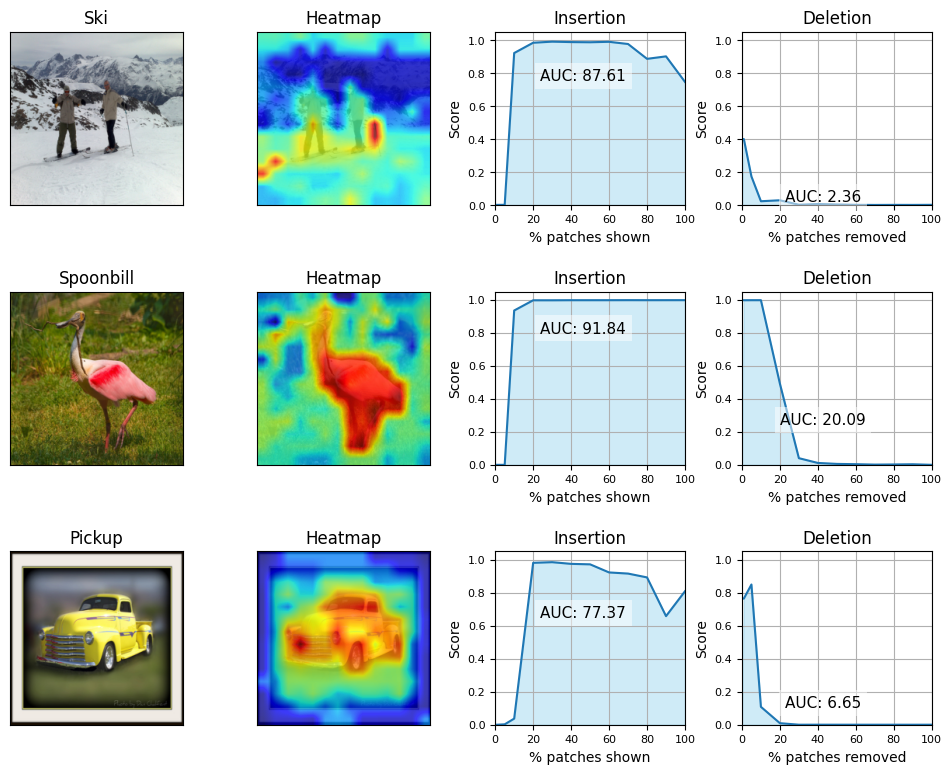

In [31]:
# Plot AUC curves for insertion and deletion metrics
plot_auc_line(metrics_list, patch_perc, images_list, label_list, saliency_list, title = 'AUC_ViT', figsize_x = 12, figsize_y = 3, alpha = 0.75)

## Multi class image

In [ ]:
img_path = '../Example_images/elefante-zebra.jpg'

# Open the image using PIL
image = Image.open(img_path).convert('RGB')

# Resize and preprocess the image for the model
img = resizer(image, return_tensors="pt")['pixel_values'][0]

saliency1, _ = model_vit.get_saliency(img_path, token_ratio, masks_layers, starting_layer, 385)
saliency2, _ = model_vit.get_saliency(img_path, token_ratio, masks_layers, starting_layer, 340)

# Display overlay of image and saliency map
overlay2(img, saliency1, saliency2, title = 'ViT_multiclass')

# DeiT

In [ ]:
# Initialize MUTEX model for DeiT
model_deit = SIGRATE('deit', 'cpu')

## Single Image Plot

In [ ]:
img_path = '../Example_images/pickup.jpg'

# Open the image using PIL
image = Image.open(img_path).convert('RGB')

# Resize and preprocess the image for the model
img = resizer(image, return_tensors="pt")['pixel_values'][0]

saliency, label = model_deit.get_saliency(img_path, token_ratio, masks_layers, starting_layer)

# Display overlay of image and saliency map
overlay(img, saliency)

## Multi image plot with AUC

In [ ]:
# Percentage of patches for insertion and deletion metrics
patch_perc = [1, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# Baseline for insertion and deletion calculation
baseline = 'black'

In [ ]:
# Lists to store metrics, images, and labels
metrics_list = []
images_list = []
label_list = []
saliency_list = []

# Loop over each image path
for i in range(len(img_paths)):
    img_path = img_paths[i]
    start_time = time.time()

    # Get saliency map and label using MLEx model
    saliency, label = model_deit.get_saliency(img_path, token_ratio, masks_layers, starting_layer)
    print(f'Time taken: {time.time() - start_time}')

    # Open the image using PIL
    image = Image.open(img_path).convert('RGB')

    # Resize and preprocess the image for the model
    img = resizer(image, return_tensors="pt")['pixel_values'][0]

    # Display overlay of image and saliency map
    overlay(img, saliency)

    # Get insertion and deletion metrics
    metrics = model_deit.get_insertion_deletion(patch_perc, saliency, image, baseline, label)

    # Append metrics, image, and label to respective lists
    metrics_list.append(metrics)
    images_list.append(img)
    label_list.append(imagenet_label_dict[label + 1])
    saliency_list.append(saliency)

In [ ]:
# Plot AUC curves for insertion and deletion metrics
plot_auc_line(metrics_list, patch_perc, images_list, label_list, saliency_list, title = 'AUC_DeiT', figsize_x = 12, figsize_y = 3, alpha = 0.75)

## Multi class image

In [ ]:
img_path = '../Example_images/elefante-zebra.jpg'

# Open the image using PIL
image = Image.open(img_path).convert('RGB')

# Resize and preprocess the image for the model
img = resizer(image, return_tensors="pt")['pixel_values'][0]

saliency1, _ = model_deit.get_saliency(img_path, token_ratio, masks_layers, starting_layer, 385)
saliency2, _ = model_deit.get_saliency(img_path, token_ratio, masks_layers, starting_layer, 340)

# Display overlay of image and saliency map
overlay2(img, saliency1, saliency2, title = 'ViT_multiclass')